Version TensorFlow : 2.19.0
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Itération 0, perte = 4.788
Itération 10, perte = 45.230
Itération 20, perte = 70.085
Itération 30, perte = 97.286


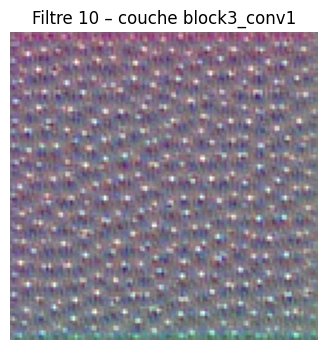

In [1]:
# Notebook Colab – Visualisation des représentations internes d’un CNN
# Toutes les explications sont en français. Ce notebook est conçu pour
# fonctionner sur le GPU gratuit de Google Colab.

# -------------------------------------------------------------
# 1. Import des bibliothèques
# -------------------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

print("Version TensorFlow :", tf.__version__)

# -------------------------------------------------------------
# 2. Chargement d’un modèle pré-entraîné
# -------------------------------------------------------------
# Nous utilisons VGG16 sans la partie classification finale.
# Ce modèle est léger et fonctionne bien sur Colab gratuit.

base_model = vgg16.VGG16(weights="imagenet", include_top=False)
base_model.trainable = False
base_model.summary()

# -------------------------------------------------------------
# 3. Choix de la couche et du filtre à visualiser
# -------------------------------------------------------------
# On peut changer ces valeurs pour explorer d’autres parties du réseau.

layer_name = "block3_conv1"
filter_index = 10

layer_output = base_model.get_layer(layer_name).output
feature_model = keras.Model(inputs=base_model.input, outputs=layer_output)

# -------------------------------------------------------------
# 4. Création d’une image aléatoire de départ
# -------------------------------------------------------------
# Taille réduite pour rester compatible avec le GPU limité.

img_height = 128
img_width = 128

input_img = tf.random.uniform((1, img_height, img_width, 3))

# -------------------------------------------------------------
# 5. Fonction de calcul de la perte
# -------------------------------------------------------------
# On cherche à maximiser l’activation moyenne du filtre choisi.

def compute_loss(image):
    activations = feature_model(image)
    filter_activation = activations[:, :, :, filter_index]
    return tf.reduce_mean(filter_activation)

# -------------------------------------------------------------
# 6. Étape de montée de gradient
# -------------------------------------------------------------

def gradient_ascent_step(image, learning_rate=10.0):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image, loss

# -------------------------------------------------------------
# 7. Boucle d’optimisation
# -------------------------------------------------------------

iterations = 40
for i in range(iterations):
    input_img, loss = gradient_ascent_step(input_img)
    if i % 10 == 0:
        print(f"Itération {i}, perte = {loss.numpy():.3f}")

# -------------------------------------------------------------
# 8. Post-traitement de l’image
# -------------------------------------------------------------

def deprocess_image(img):
    img = img[0].numpy()
    img -= img.mean()
    img /= (img.std() + 1e-5)
    img *= 0.1
    img += 0.5
    img = np.clip(img, 0, 1)
    img *= 255
    return np.clip(img, 0, 255).astype("uint8")

result = deprocess_image(input_img)

# -------------------------------------------------------------
# 9. Affichage du résultat
# -------------------------------------------------------------

plt.figure(figsize=(4, 4))
plt.title(f"Filtre {filter_index} – couche {layer_name}")
plt.imshow(result)
plt.axis("off")
plt.show()

# -------------------------------------------------------------
# 10. Pistes d’exploration
# -------------------------------------------------------------
# - Changer layer_name pour une couche plus profonde
# - Tester d’autres indices de filtres
# - Réduire la taille d’image à 96x96 pour aller plus vite
# - Ajouter une régularisation (flou léger) toutes les 5 itérations
# -------------------------------------------------------------
